# Regression Tree & Random Forest
# Komarist Katya, EK-61

In [1]:
#imports
import matplotlib.pyplot as plt
import seaborn as sns

import math
import re

import pandas as pd
from pandas.tseries.offsets import DateOffset
import numpy as np

from datetime import date, timedelta
import plotly.offline as ply
import plotly.graph_objs as go
from plotly.tools import make_subplots
import plotly.express as px

ply.init_notebook_mode(connected=True)

from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling


import plotly.graph_objects as go
%matplotlib inline

In [2]:
# Загрузка подготовленного датасета, создание тестовой и обучающей выборки

In [3]:
data = pd.read_csv("airbnb_prep.csv", header = 0, sep=';')

In [5]:
df = data.copy()

In [6]:
# Создаиние тестовой и обучающей выборки
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [12]:
#Загружается сравнительная таблице по ранее построенным моделям
summary = pd.read_csv('summary.csv')
summary = summary [[ 'model', 'R2_train', 'R2_test', 'MSE_train', 'MSE_test']]

In [13]:
summary

,model,R2_train,R2_test,MSE_train,MSE_test
0,simle_linear_accomodates,0.255,0.247,7592.33,7423.67
1,simple_linear_bedrooms,0.259,0.325,7545.87,6651.37
2,multiple_linear_all,0.513,0.260,4958.94,7292.65
3,multiple_linear2,0.513,0.488,4967.65,5046.47
4,polynomial_regression,0.260,0.325,7545.85,6652.33


Вначале построим модель дерева решений с использованием одного фактора - bedrooms

In [41]:
# Fitting Tree to the Training set (engine-size)
from sklearn.tree import DecisionTreeRegressor
sdt=DecisionTreeRegressor(max_leaf_nodes=10).fit(X_train[:, 6:7], y_train)

In [42]:
# Predicting the Test set results
y_pred=sdt.predict(X_test[:, 6:7])

In [43]:
# Coefficient of determination R^2
model_summary = {'model':'simple_tree', 'R2_train':round(sdt.score(X_train[:, 6:7], y_train),3)
                ,'R2_test':round(sdt.score(X_test[:,6:7], y_test),3)}
sdt.score(X_train[:, 6:7], y_train), sdt.score(X_test[:,6:7], y_test)

(0.2624961053029521, 0.32708492813941137)

In [44]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
model_summary['MSE_train'] =round(mean_squared_error(y_train, sdt.predict(X_train[:, 10:11])),2)
model_summary['MSE_test'] =round(mean_squared_error(y_test, y_pred),2)
mean_squared_error(y_train, sdt.predict(X_train[:, 10:11])), mean_squared_error(y_test, y_pred)

(9704.885277718933, 6634.896217366601)

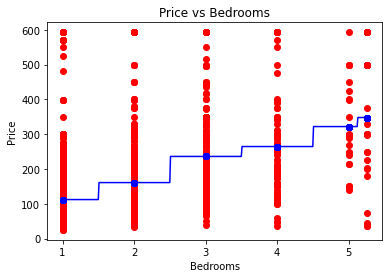

In [45]:
# Visualising the Training set results
X_grid=np.arange(min(X[:, 6:7]), max(X[:, 6:7]), 0.01)
X_grid=X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color='blue')
plt.scatter(X_train[:, 6], y_train, color='red')
plt.plot(X_train[:, 6], sdt.predict(X_train[:, 6:7]), 'bo')
plt.title('Price vs Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

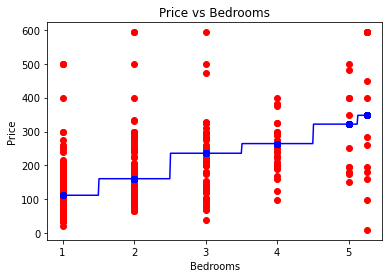

In [46]:
# Visualising the Training set results
X_grid=np.arange(min(X[:, 6:7]), max(X[:, 6:7]), 0.01)
X_grid=X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color='blue')
plt.scatter(X_test[:, 6], y_test, color='red')
plt.plot(X_test[:, 6], sdt.predict(X_test[:, 6:7]), 'bo')
plt.title('Price vs Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

In [47]:
summary = summary.append(model_summary, ignore_index=True)
summary

,model,R2_train,R2_test,MSE_train,MSE_test
0,simle_linear_accomodates,0.255,0.247,7592.33,7423.67
1,simple_linear_bedrooms,0.259,0.325,7545.87,6651.37
2,multiple_linear_all,0.513,0.260,4958.94,7292.65
3,multiple_linear2,0.513,0.488,4967.65,5046.47
4,polynomial_regression,0.260,0.325,7545.85,6652.33
5,simple_tree,0.262,0.327,9704.89,6634.90


Качество модели дерева решений с одним фактором очень низкое. 

Далее строится модель дерева решений со значимыми факторами, которые были определены в работе с регрессионными моделями.

In [48]:
X1 = df.iloc[:,[1,2,4,5,6,7,9,10,12,14,15,16,19,20,21,22,23]].values
y = df.iloc[:, 0].values
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=3)

In [49]:
# Fitting Tree to the Training set 
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_leaf_nodes=10).fit(X_train1, y_train)

In [50]:
# Predicting the Test set results
y_pred=dt.predict(X_test1)

In [51]:
# Coefficient of determination R^2
model_summary = {'model':'regression_tree', 'R2_train':round(dt.score(X_train1, y_train),3)
                ,'R2_test':round(dt.score(X_test1, y_test),3)}
dt.score(X_train1, y_train), dt.score(X_test1, y_test)

(0.5484580715866904, 0.41872243574496315)

In [52]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
model_summary['MSE_train'] =round(mean_squared_error(y_train, dt.predict(X_train1)),2)
model_summary['MSE_test'] =round(mean_squared_error(y_test, y_pred),2)
mean_squared_error(y_train, dt.predict(X_train1)), mean_squared_error(y_test, y_pred)

(4601.317506640106, 5731.356709921979)

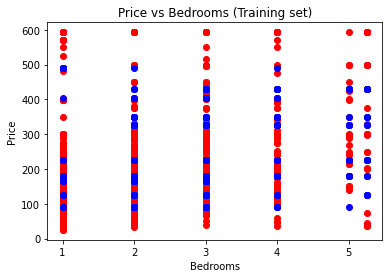

In [53]:
# Visualising the Training set results
plt.scatter(X_train1[:, 5], y_train, color='red')
plt.plot(X_train1[:, 5], dt.predict(X_train1), 'bo')
plt.title('Price vs Bedrooms (Training set)')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

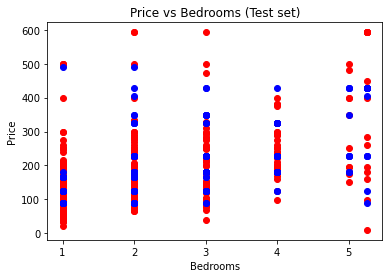

In [54]:
# Visualising the Training set results
plt.scatter(X_test1[:, 5], y_test, color='red')
plt.plot(X_test1[:, 5], dt.predict(X_test1), 'bo')
plt.title('Price vs Bedrooms (Test set)')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

In [56]:
summary = summary.append(model_summary, ignore_index=True)
summary

,model,R2_train,R2_test,MSE_train,MSE_test
0,simle_linear_accomodates,0.255,0.247,7592.33,7423.67
1,simple_linear_bedrooms,0.259,0.325,7545.87,6651.37
2,multiple_linear_all,0.513,0.260,4958.94,7292.65
3,multiple_linear2,0.513,0.488,4967.65,5046.47
4,polynomial_regression,0.260,0.325,7545.85,6652.33
5,simple_tree,0.262,0.327,9704.89,6634.90
6,regression_tree,0.548,0.419,4601.32,5731.36


В многофакторной модели дерева решений R2_train наивысший из всех моделей, однако R2_test меньше чем у multiple_linear2 (со значимыми факторами).MSE_test также больше, чем у регрессионной модели.

Далее строится модель случайного леса.

In [57]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=10, random_state=3).fit(X_train1, y_train)

In [58]:
# Predicting the Test set results
y_pred=rf.predict(X_test1)

In [59]:
# Coefficient of determination R^2
model_summary = {'model':'random_forest', 'R2_train':round(rf.score(X_train1, y_train),3)
                ,'R2_test':round(rf.score(X_test1, y_test),3)}
rf.score(X_train1, y_train), rf.score(X_test1, y_test)

(0.9144075494053259, 0.5271749855431482)

In [60]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
model_summary['MSE_train'] =round(mean_squared_error(y_train, rf.predict(X_train1)),2)
model_summary['MSE_test'] =round(mean_squared_error(y_test, y_pred),2)
mean_squared_error(y_train, rf.predict(X_train1)), mean_squared_error(y_test, y_pred)

(872.2070234793582, 4662.02204569734)

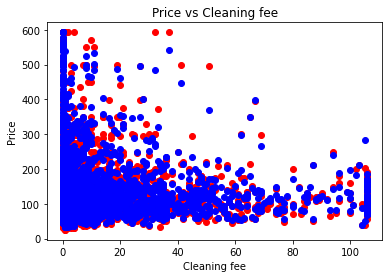

In [64]:
# Visualising the Training set results
plt.scatter(X_train1[:, 9], y_train, color='red')
plt.plot(X_train1[:,9], rf.predict(X_train1), 'bo')
plt.title('Price vs Cleaning fee')
plt.xlabel('Cleaning fee')
plt.ylabel('Price')
plt.show()

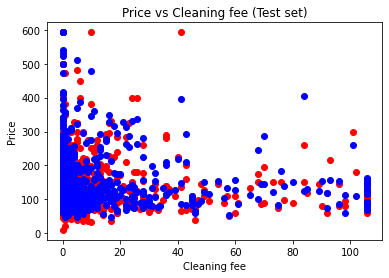

In [65]:
# Visualising the Test set results
plt.scatter(X_test1[:, 9], y_test, color='red')
plt.plot(X_test1[:,9], rf.predict(X_test1), 'bo')
plt.title('Price vs Cleaning fee (Test set)')
plt.xlabel('Cleaning fee')
plt.ylabel('Price')
plt.show()

In [66]:
summary = summary.append(model_summary, ignore_index=True)
summary

,model,R2_train,R2_test,MSE_train,MSE_test
0,simle_linear_accomodates,0.255,0.247,7592.33,7423.67
1,simple_linear_bedrooms,0.259,0.325,7545.87,6651.37
2,multiple_linear_all,0.513,0.260,4958.94,7292.65
3,multiple_linear2,0.513,0.488,4967.65,5046.47
4,polynomial_regression,0.260,0.325,7545.85,6652.33
5,simple_tree,0.262,0.327,9704.89,6634.90
6,regression_tree,0.548,0.419,4601.32,5731.36
7,random_forest,0.914,0.527,872.21,4662.02


Наилучшей моделью является модель случайного леса, построенная с использование значимых переменных.
R2_test даной модели наивысший, хотя и значительно меньше,чем R2_train. MSE_train и MSE_test также наименьшие у даной модели.

In [70]:
summary.to_csv('summary.csv')